<a href="https://colab.research.google.com/github/t-sasatani/wpt-analysis/blob/main/examples/measurement_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os

if 'COLAB_GPU' in os.environ:
    !pip install git+https://github.com/t-sasatani/wpt-analysis

In [23]:
from wpt_tools import analysis

### Create instance of analysis and set initial variables

In [24]:
wpt_eval_ins = analysis.nw_tools()
rx_port = 1 # 1 or 2

### Import 2-port network data

In [25]:
mode = 'file'

if mode == 'file':
    wpt_eval_ins.import_touchstone('./assets/100mmTX_20mmRX_40mmD-1.s2p')

Loaded touchstone file: ./assets/100mmTX_20mmRX_40mmD-1.s2p


### Plot Z-parameters (full-range)

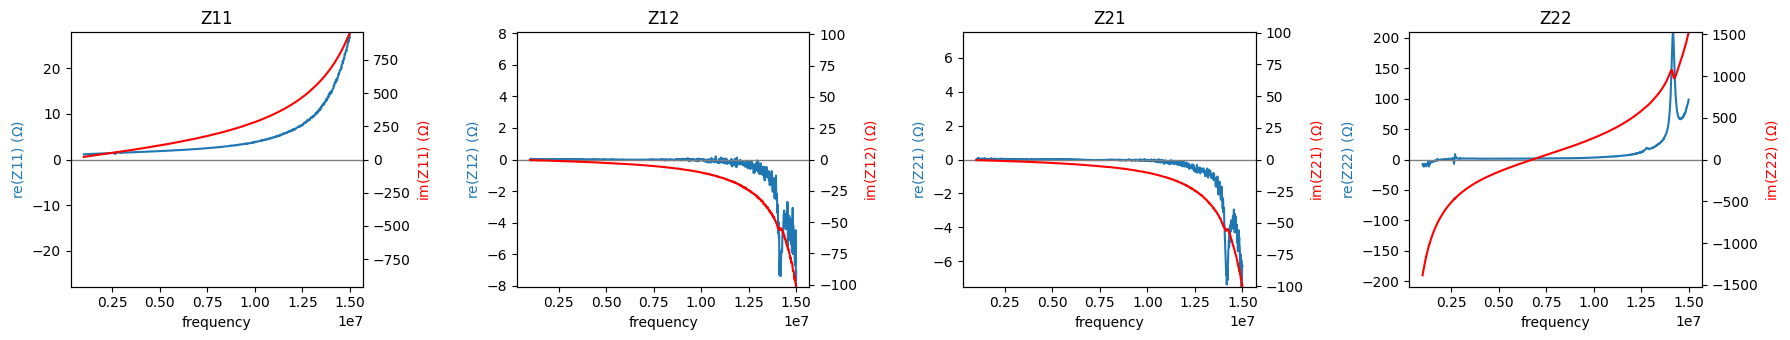

In [26]:
wpt_eval_ins.plot_z_full()

### Efficiency and optimal load analysis (for general 2-port networks)
This becomes unstable when the analysis frequency is far from the resonant frequency.
This is probably because to S to Z conversion becomes unstable.

Target frequency: 7.272e+06
Maximum efficiency: 0.45
Optimum Re(Zload): 6.39
Optimum Im(Zload): -170.13


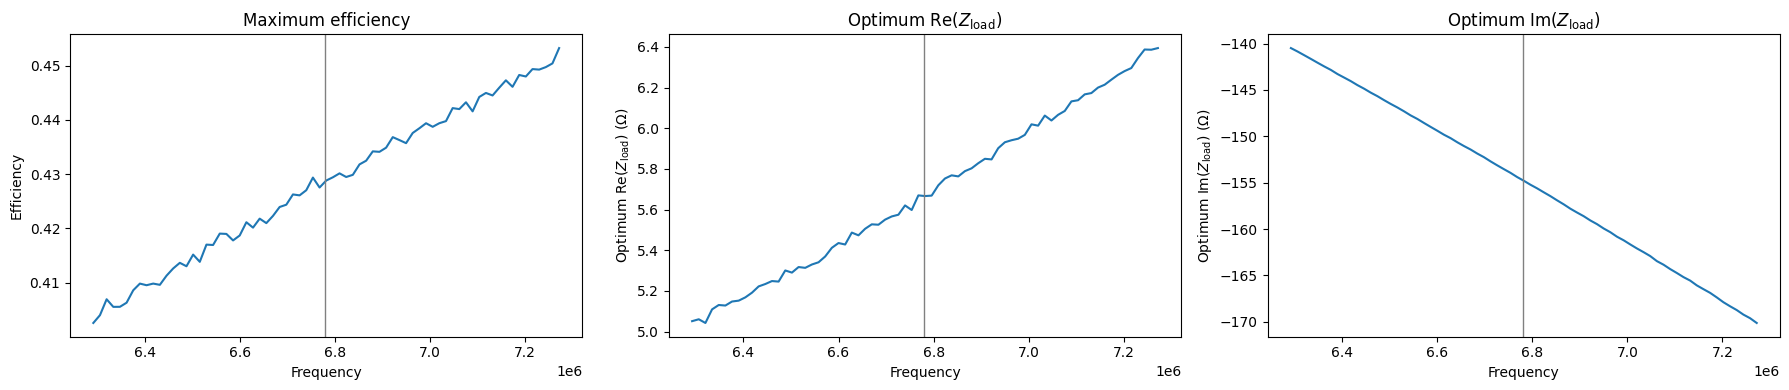

In [27]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
f_opt, eff_opt, r_opt, x_opt = wpt_eval_ins.efficiency_load_analysis(show_plot=1, rx_port=rx_port)

### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

R2 for fitting Ls1, Cs1: 0.999540
R2 for fitting Ls2, Cs2: 0.999822
Self impedance at target frequency

Re(Z11): 2.27e+00
Im(Z11): 1.55e+02

Re(Z22): 1.58e+00
Im(Z22) -3.21e-01

Fitting values assuming a pair of series LCR resonators

Ls1: 4.22e-06, Cs1: 9.48e-10, Rs1: 2.27e+00, f_1: 2.516e+06, Q_1 (approximate, @6.780e+06 Hz): 7.92e+01
Ls2: 6.02e-06, Cs2: 9.15e-11, Rs2: 1.58e+00, f_2: 6.782e+06, Q_2 (approximate, @6.780e+06 Hz): 1.62e+02
Lm: -1.02e-07, km: -0.020


(4.219400776256144e-06,
 9.48165374374663e-10,
 array([2.27027173]),
 6.020254725112913e-06,
 9.147605993327865e-11,
 array([1.57843751]),
 array([-1.02031277e-07]))

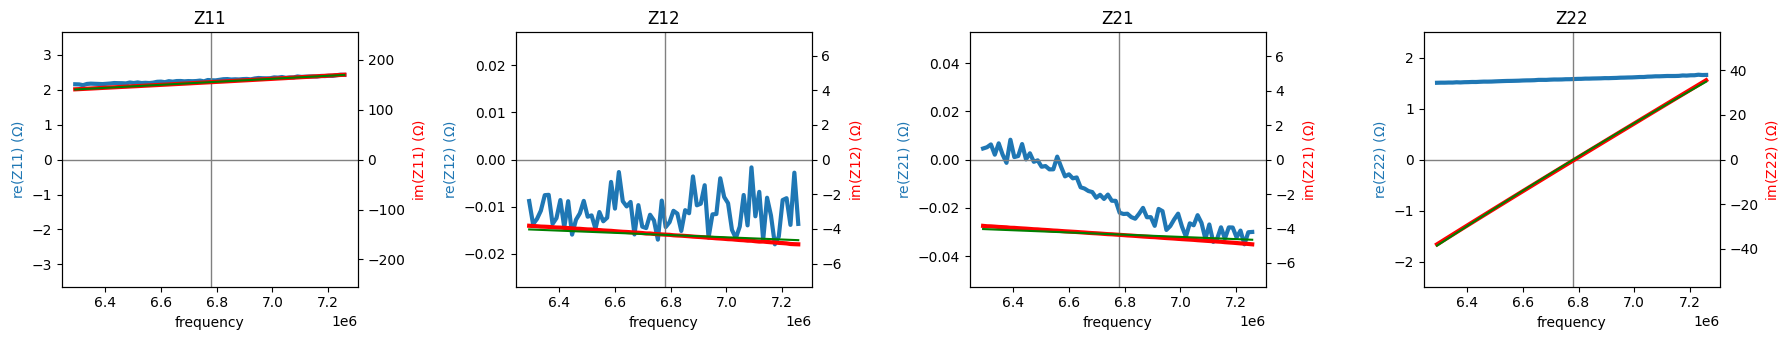

In [28]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.plot_z_narrow_fit()

### Optimal load visualization

2024-07-09 22:59:21,577 : DEBUG : colorbar.py - locator: <matplotlib.ticker.AutoLocator object at 0x00000255C4E367D0>
2024-07-09 22:59:21,918 : DEBUG : colorbar.py - locator: <matplotlib.ticker.AutoLocator object at 0x00000255C4E63610>
2024-07-09 22:59:22,259 : DEBUG : colorbar.py - locator: <matplotlib.ticker.AutoLocator object at 0x00000255C51944D0>


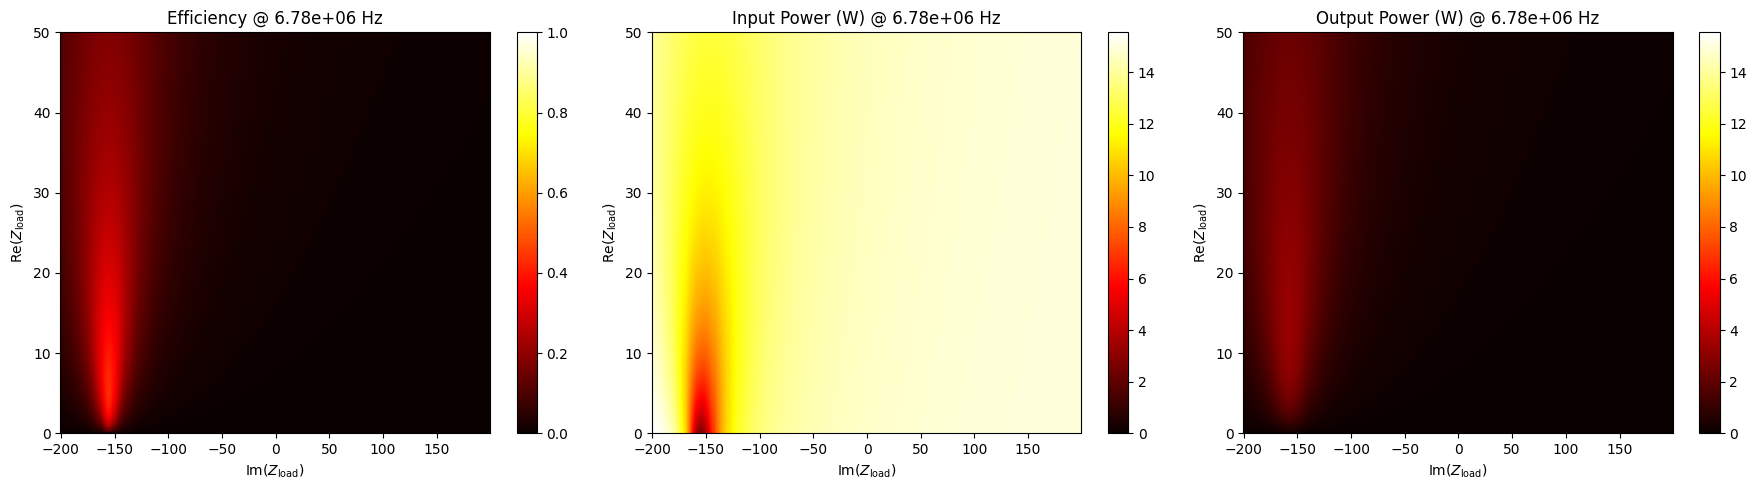

In [29]:
wpt_eval_ins.optimal_load_plot(min_rez=0.1, max_rez=50, step_rez=0.2,\
    min_imz=-200, max_imz=200, step_imz=1, input_voltage=5, rx_port=rx_port)

### Capacitor filter calculator
![](https://github.com/t-sasatani/wpt-analysis/blob/main/examples/img/CpCsRltopology.png?raw=1)

In [21]:
wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.rxc_filter_calc(rx_port = rx_port, rload = 100, c_network = 'CpCsRl')

Target frequency: 7.272e+06
Maximum efficiency: 0.45
Receiver inductance: 4.22e-06
Optimum load: 6.39
Target Rload: 100.00

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 82
         Function evaluations: 158
[8.49553873e-11 2.89396275e-11]
